In [1]:
from __future__ import unicode_literals

import pandas as pd
import numpy as np
from datetime import date
import urllib
import glob
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### For reference - downloading of weather files

data_url = "http://www.weather.gov.sg/files/dailydata/"
file_header = "DAILYDATA_S24_"
file_type = ".csv"
data_dir = "data/weather/"

for year in range(1980, 2017):
    for month in range(1, 13):
        d = date(year, month, 1)
        file_name = file_header + d.strftime("%Y%m") + file_type
        file_url = data_url + file_name
        urllib.urlretrieve(file_url, data_dir + file_name)

allFiles = glob.glob(data_dir + "*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=None, header=0, encoding='iso-8859-1')
    list_.append(df)
frame = pd.concat(list_)

frame = frame.applymap(lambda x: x.encode('ascii', errors='ignore') if type(x) == unicode else x)

frame.to_csv("data/full_weather_new.csv", encoding='iso-8859-1', index=False)

### Start of Lab 

In [2]:
weather = pd.read_csv("data/full_weather_new.csv", encoding='iso-8859-1')

In [3]:
weather.columns = ['Station', 'Year', 'Month', 'Day', 'Daily_Rainfall_Total', 'Highest_30Min_Rainfall', 
                   'Highest_60Min_Rainfall', 'Highest_120Min_Rainfall', 'Mean_Temperature', 'Max_Temperature',
                   'Min_Temperature','Mean_Wind_Speed', 'Max_Wind_Speed']

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 13 columns):
Station                    13515 non-null object
Year                       13515 non-null int64
Month                      13515 non-null int64
Day                        13515 non-null int64
Daily_Rainfall_Total       13515 non-null float64
Highest_30Min_Rainfall     1095 non-null float64
Highest_60Min_Rainfall     1095 non-null float64
Highest_120Min_Rainfall    1095 non-null float64
Mean_Temperature           12784 non-null float64
Max_Temperature            12784 non-null float64
Min_Temperature            12784 non-null float64
Mean_Wind_Speed            12409 non-null float64
Max_Wind_Speed             12408 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 1.3+ MB


In [5]:
weather.head()

,Station,Year,Month,Day,Daily_Rainfall_Total,Highest_30Min_Rainfall,Highest_60Min_Rainfall,Highest_120Min_Rainfall,Mean_Temperature,Max_Temperature,Min_Temperature,Mean_Wind_Speed,Max_Wind_Speed
0,Changi,1980,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Changi,1980,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Changi,1980,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Changi,1980,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Changi,1980,1,5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Date Index 

In [6]:
weather['Date'] = pd.to_datetime(weather[['Year','Month','Day']])

In [7]:
weather.set_index('Date', inplace=True)

#### Filter the data for rows in August 2015 

In [8]:
weather['2015-08']

,Station,Year,Month,Day,Daily_Rainfall_Total,Highest_30Min_Rainfall,Highest_60Min_Rainfall,Highest_120Min_Rainfall,Mean_Temperature,Max_Temperature,Min_Temperature,Mean_Wind_Speed,Max_Wind_Speed
Date,,,,,,,,,,,,,
2015-08-01,Changi,2015,8,1,1.6,0.6,1.0,1.4,26.7,29.3,24.1,8.1,36.7
2015-08-02,Changi,2015,8,2,0.0,0.0,0.0,0.0,28.7,32.1,25.9,10.6,39.6
2015-08-03,Changi,2015,8,3,26.2,15.8,18.6,18.8,26.2,28.7,22.6,7.5,31.3
2015-08-04,Changi,2015,8,4,6.2,2.2,3.6,5.6,27.1,29.7,24.2,6.3,22.7
2015-08-05,Changi,2015,8,5,0.0,0.0,0.0,0.0,28.5,30.8,26.7,11.9,29.2
2015-08-06,Changi,2015,8,6,1.6,0.8,1.0,1.4,27.3,30.1,25.5,9.0,29.5
2015-08-07,Changi,2015,8,7,20.2,10.6,10.6,11.0,27.2,30.1,24.6,8.6,35.3
2015-08-08,Changi,2015,8,8,28.2,26.6,28.0,28.2,28.1,31.0,23.6,9.1,26.6
2015-08-09,Changi,2015,8,9,14.2,12.6,13.2,13.6,27.5,30.5,22.7,10.5,47.5


#### Using seaborn's factorplot, create a boxplot of mean temperature by month 

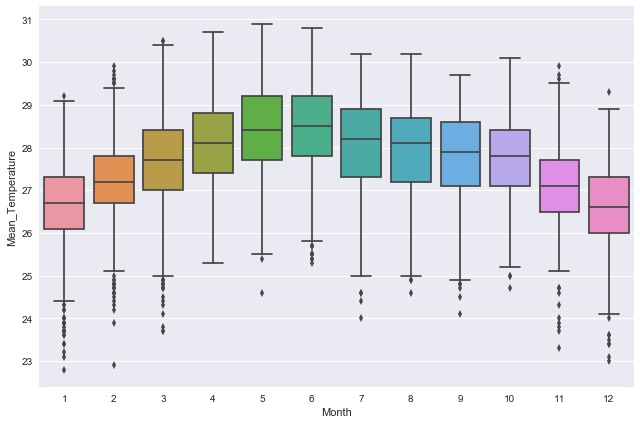

In [9]:
sb.factorplot(
    x = 'Month',
    y = 'Mean_Temperature',
    kind = 'box',
    data = weather,
    size = 6,
    aspect = 1.5
)

#### Plot lines of the max and min daily temperatures in 2016

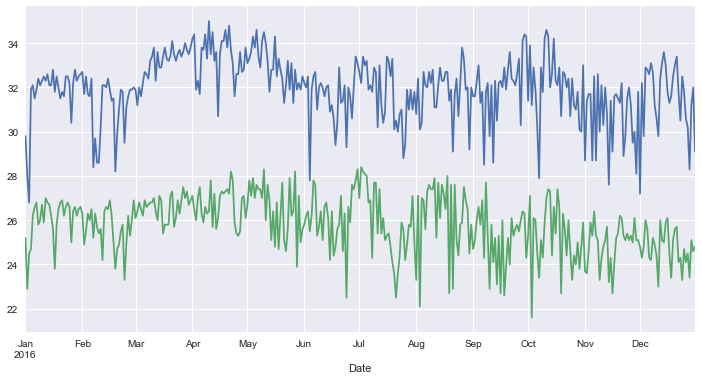

In [10]:
weather['2016']['Max_Temperature'].plot(figsize=(12,6))
weather['2016']['Min_Temperature'].plot(figsize=(12,6))

#### Calculate the Autocorrelation for Daily Rainfall Total with one day and 365 day lags

In [12]:
weather['Daily_Rainfall_Total'].autocorr(lag=1)

0.14335375058561553

In [13]:
weather['Daily_Rainfall_Total'].autocorr(lag=365)

0.024105967439804823

#### Calculate the Autocorrelation for Mean Temperature with one day and 365 day lags

In [14]:
weather['Mean_Temperature'].autocorr(lag=1)

0.6997972740306917

In [15]:
weather['Mean_Temperature'].autocorr(lag=365)

0.32613842572406743

#### Plot the mean temperatures resampled over a monthly period from 2012 to 2017 (calculate the resamples using both median and mean)

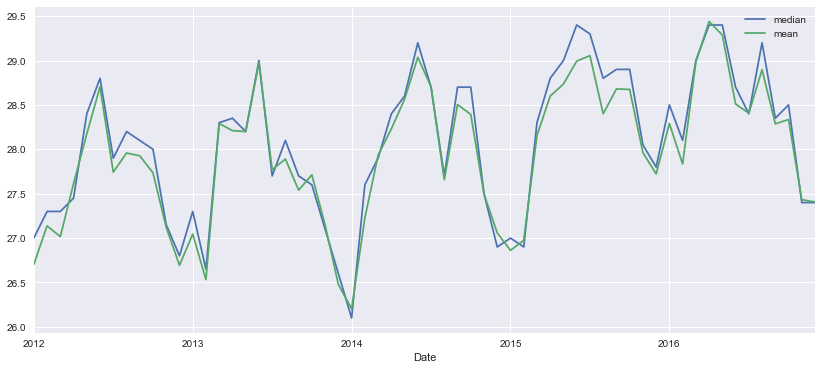

In [16]:
weather['2012':'2017']['Mean_Temperature'].resample('M').apply(["median", "mean"]).plot(figsize=(14,6))

#### Plot the rolling mean of monthly mean temperatures from 2012 to 2017. Use a window = 3 and center = True

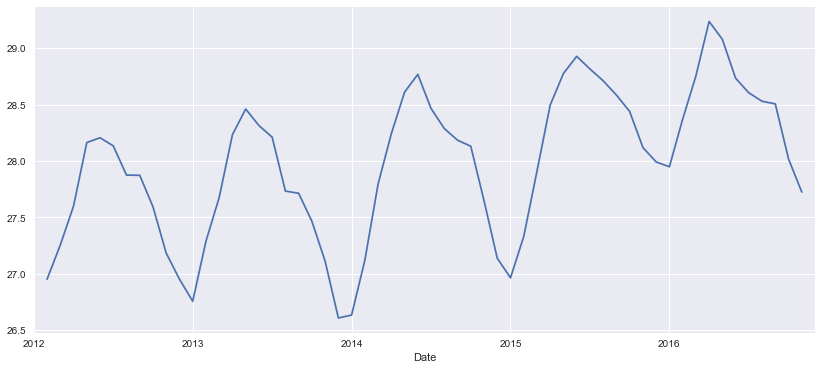

In [17]:
weather['2012':'2017']['Mean_Temperature'].resample('M').mean().rolling(window=3, center=True).mean().plot(figsize=(14,6))

#### Which month saw the greatest increase in Mean Temperature compared to the previous month? 

In [18]:
weather['Mean_Temperature'].resample('M').mean().diff(periods=1).sort_values(ascending=False)[:5]

Date
2005-02-28    1.898848
2013-03-31    1.758180
1983-02-28    1.609101
2008-04-30    1.514516
2010-02-28    1.433756
Name: Mean_Temperature, dtype: float64

#### Plot the expanding mean of monthly mean temperatures 

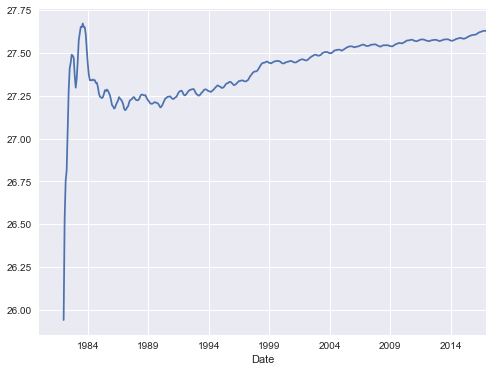

In [19]:
weather['Mean_Temperature'].resample('M').mean().expanding().mean().plot(figsize=(8,6))

#### What other interesting insights can you obtain from the data?